<a href="https://colab.research.google.com/github/KevOdhiambo/Unsupervised-Learning-With-R/blob/main/Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Analysis Objectives
Customer ratings on shopping experience is integral to the the sales that a supermarket makes. Predicting the cutomer rating would be helpful to the Carrefour marketing team in determing how consumers review their shopping experience and their sentiment on different product categories.


In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
#Install the required Packages
install.packages('corrplot')
install.packages('caret')



(as ‘lib’ is unspecified)







	‘/tmp/Rtmpf4UQqW/downloaded_packages’

(as ‘lib’ is unspecified)

































































































































	‘/tmp/Rtmpf4UQqW/downloaded_packages’



In [3]:
%%R
#Load the necessary package libraries
library(caret)
library(corrplot)

In [4]:
%%R
#LOad the Sales Data Dataset
sales<- read.csv('SalesData.csv')

In [5]:
%%R
#preview our dataset
head(sales, 5)

   Invoice.ID Branch Customer.type Gender           Product.line Unit.price
1 750-67-8428      A        Member Female      Health and beauty      74.69
2 226-31-3081      C        Normal Female Electronic accessories      15.28
3 631-41-3108      A        Normal   Male     Home and lifestyle      46.33
4 123-19-1176      A        Member   Male      Health and beauty      58.22
5 373-73-7910      A        Normal   Male      Sports and travel      86.31
  Quantity     Tax      Date  Time     Payment   cogs gross.margin.percentage
1        7 26.1415  1/5/2019 13:08     Ewallet 522.83                4.761905
2        5  3.8200  3/8/2019 10:29        Cash  76.40                4.761905
3        7 16.2155  3/3/2019 13:23 Credit card 324.31                4.761905
4        8 23.2880 1/27/2019 20:33     Ewallet 465.76                4.761905
5        7 30.2085  2/8/2019 10:37     Ewallet 604.17                4.761905
  gross.income Rating    Total
1      26.1415    9.1 548.9715
2       3.8200

In [6]:
%%R
# Set gross.margin percentage and gross income to null
sales$gross.margin.percentage <- NULL
sales$gross.income <- NULL

In [7]:
%%R
#Get the summary Statistics
summary(sales[, c(2:8, 11:12)])

    Branch          Customer.type         Gender          Product.line      
 Length:1000        Length:1000        Length:1000        Length:1000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
   Unit.price       Quantity          Tax            Payment         
 Min.   :10.08   Min.   : 1.00   Min.   : 0.5085   Length:1000       
 1st Qu.:32.88   1st Qu.: 3.00   1st Qu.: 5.9249   Class :character  
 Median :55.23   Median : 5.00   Median :12.0880   Mode  :character  
 Mean   :55.67   Mean   : 5.51   Mean   :15.3794                     
 3rd Qu.:77.94   3rd Qu.: 8.00   3rd Qu.:22.4453                     
 Max.   :99.96   Max.   :10.00   Max.   :

In [8]:
%%R
#set the columns variables to null for those that i dont need for my selection
row.names(sales)<- sales$Invoice.ID
sales$Invoice.ID <- NULL
sales$Date <- NULL
sales$Time <- NULL

In [10]:
%%R
# Encode categorical variables
sales$Customer.type <- ifelse(sales$Customer.type == 'Member', 1,0)
sales$Gender <- ifelse(sales$Gender == 'Male', 1,0)
dmy <- dummyVars(" ~ .", data = sales)
sales2 <- data.frame(predict(dmy, newdata = sales))


In [13]:
%%R
#Install the dplyr package
install.packages("dplyr")

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpf4UQqW/downloaded_packages’



In [14]:
%%R
#load the dplyr package
library(dplyr)

Attaching package: ‘dplyr’



    filter, lag



    intersect, setdiff, setequal, union




In [15]:
%%R
#preview our new dataset to ssee our encoded dataset
glimpse(sales2)

Rows: 1,000
Columns: 20
$ BranchA                            <dbl> 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,…
$ BranchB                            <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,…
$ BranchC                            <dbl> 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,…
$ Customer.type                      <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ Gender                             <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ Product.lineElectronic.accessories <dbl> 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,…
$ Product.lineFashion.accessories    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,…
$ Product.lineFood.and.beverages     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,…
$ Product.lineHealth.and.beauty      <dbl> 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,…
$ Product.lineHome.and.lifestyle     <dbl> 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,…
$ Product.lineSports.and.travel      <dbl> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,…
$ Unit.price                         <dbl> 74.69, 15.28, 46.33, 58.22, 86.31, …
$ Quantity      

In [16]:
%%R
# Calculating the correlation matrix
correlationMatrix <- cor(sales2)

In [17]:
%%R
# Find attributes that are highly correlated
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff= 0.75)

In [19]:
%%R
# Highly correlated attribute names

names(sales2[,highlyCorrelated])

#Tax and cogs columns are highly correlated. 
# cogs is the price before addition of tax while total is the addition of cogs and tax

[1] "cogs"  "Total"


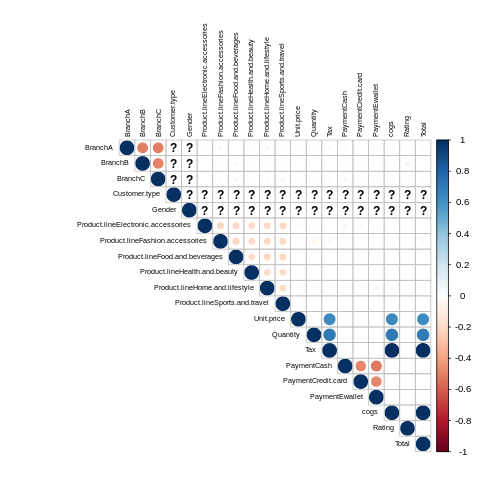

In [20]:
%%R
#plot the correlation matrix plot
corrplot(correlationMatrix, type='upper', tl.cex=0.6, tl.col = 'black')

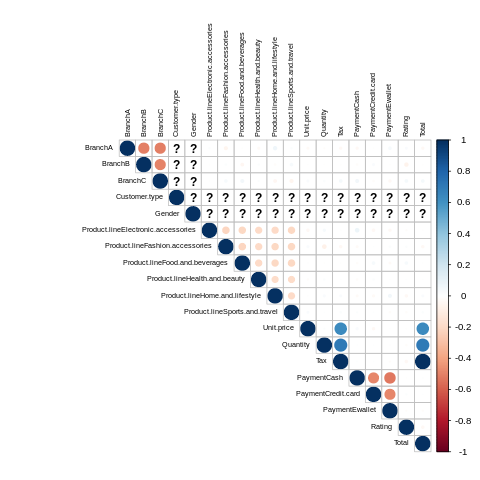

In [21]:
%%R
# Correlation plot after removal of cogs
correlationMatrix2 <- cor(sales2[,c(1:17, 19:20)])
corrplot(correlationMatrix2, type='upper', tl.col = 'black', tl.cex = 0.6)